<a href="https://colab.research.google.com/github/viniciusbeckerdesouza/data_science/blob/main/notebooks/acidentes_aereos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import seaborn as sns
import numpy as np


In [ ]:
df = pd.read_csv("http://sistema.cenipa.aer.mil.br/cenipa/media/opendata/ocorrencia_2010_2020.csv", sep=';')

In [ ]:
df = df.drop(columns=['codigo_ocorrencia', 'codigo_ocorrencia1', 'codigo_ocorrencia2',
       'codigo_ocorrencia3', 'codigo_ocorrencia4'])
df.head()

,ocorrencia_classificacao,ocorrencia_latitude,ocorrencia_longitude,ocorrencia_cidade,ocorrencia_uf,ocorrencia_pais,ocorrencia_aerodromo,ocorrencia_dia,ocorrencia_hora,investigacao_aeronave_liberada,investigacao_status,divulgacao_relatorio_numero,divulgacao_relatorio_publicado,divulgacao_dia_publicacao,total_recomendacoes,total_aeronaves_envolvidas,ocorrencia_saida_pista
0,INCIDENTE,***,***,RIO DE JANEIRO,RJ,BRASIL,****,03/01/2010,12:00:00,SIM,FINALIZADA,***,NÃO,NaN,0,1,NÃO
1,INCIDENTE,NaN,NaN,BELÉM,PA,BRASIL,SBBE,03/01/2010,11:05:00,SIM,FINALIZADA,NaN,NÃO,NaN,0,1,NÃO
2,INCIDENTE,NaN,NaN,RIO DE JANEIRO,RJ,BRASIL,SBRJ,03/01/2010,03:00:00,SIM,FINALIZADA,NaN,NÃO,NaN,0,1,NÃO
3,ACIDENTE,-13.1066666667,-55.9930555556,LUCAS DO RIO VERDE,MT,BRASIL,****,04/01/2010,17:30:00,SIM,FINALIZADA,A-539/CENIPA/2018,SIM,2019-10-28,0,1,NÃO
4,INCIDENTE,NaN,NaN,PELOTAS,RS,BRASIL,SBPK,05/01/2010,19:25:00,SIM,FINALIZADA,NaN,NÃO,NaN,0,1,NÃO


In [ ]:
df.describe()

,total_recomendacoes,total_aeronaves_envolvidas
count,5752.000000,5752.000000
mean,0.303894,1.011996
std,1.153253,0.113566
min,0.000000,1.000000
25%,0.000000,1.000000
50%,0.000000,1.000000
75%,0.000000,1.000000
max,23.000000,3.000000


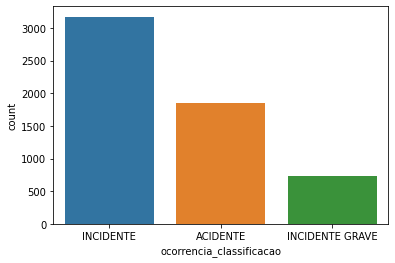

In [ ]:
sns.countplot(data=df, x='ocorrencia_classificacao')
plt.show()

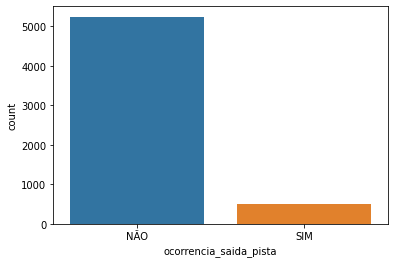

In [ ]:
sns.countplot(data=df, x='ocorrencia_saida_pista')
plt.show()

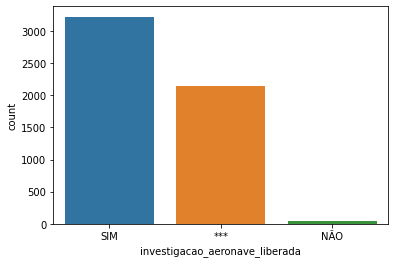

In [ ]:
sns.countplot(data=df, x='investigacao_aeronave_liberada')
plt.show()

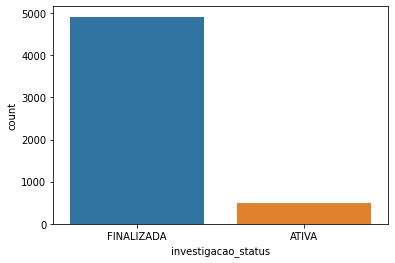

In [ ]:
sns.countplot(data=df, x='investigacao_status')
plt.show()

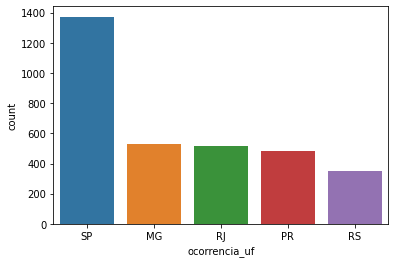

In [ ]:
sns.countplot(data=df, x='ocorrencia_uf', order=df['ocorrencia_uf'].value_counts().index[:5])

plt.show()

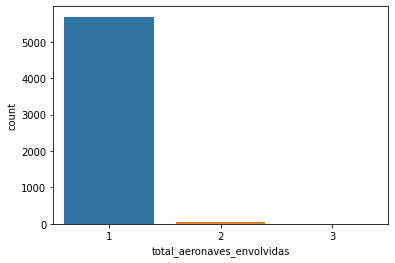

In [ ]:
sns.countplot(data=df, x='total_aeronaves_envolvidas')
plt.show()

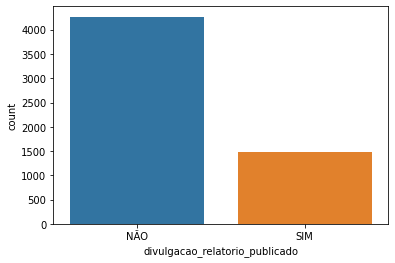

In [ ]:
sns.countplot(data=df, x='divulgacao_relatorio_publicado')
plt.show()

In [ ]:
grave = df.query('ocorrencia_classificacao == "INCIDENTE GRAVE"')

In [ ]:
grave.head()

,ocorrencia_classificacao,ocorrencia_latitude,ocorrencia_longitude,ocorrencia_cidade,ocorrencia_uf,ocorrencia_pais,ocorrencia_aerodromo,ocorrencia_dia,ocorrencia_hora,investigacao_aeronave_liberada,investigacao_status,divulgacao_relatorio_numero,divulgacao_relatorio_publicado,divulgacao_dia_publicacao,total_recomendacoes,total_aeronaves_envolvidas,ocorrencia_saida_pista
7,INCIDENTE GRAVE,-6.5319444444,-64.3805555556,CANUTAMA,AM,BRASIL,****,09/01/2010,12:30:00,SIM,FINALIZADA,IG-028/CENIPA/2011,SIM,2011-07-21,3,1,NÃO
8,INCIDENTE GRAVE,-15.2402777778,-59.3541666667,CASCAVEL,PR,BRASIL,SBCA,10/01/2010,23:15:00,SIM,FINALIZADA,I-004/CENIPA/2011,SIM,2011-06-30,2,1,NÃO
9,INCIDENTE GRAVE,***,***,PARÁ DE MINAS,MG,BRASIL,****,10/01/2010,20:00:00,***,NaN,NaN,NÃO,NaN,0,1,NÃO
29,INCIDENTE GRAVE,-25.4033333333,-49.2336111111,CURITIBA,PR,BRASIL,SBBI,23/01/2010,16:36:00,***,FINALIZADA,IG-029/CENIPA/2011,SIM,2011-07-21,2,1,SIM
35,INCIDENTE GRAVE,-10.290000,-48.357778,PALMAS,TO,BRASIL,SBPJ,26/01/2010,16:50:00,SIM,FINALIZADA,IG-575/CENIPA/2014,SIM,2014-10-13,0,1,NÃO


In [ ]:
grave.describe()

,total_recomendacoes,total_aeronaves_envolvidas
count,737.000000,737.000000
mean,0.504749,1.027137
std,1.484628,0.170745
min,0.000000,1.000000
25%,0.000000,1.000000
50%,0.000000,1.000000
75%,0.000000,1.000000
max,20.000000,3.000000


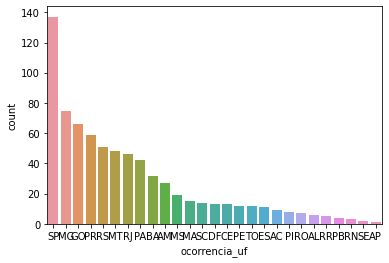

In [ ]:
sns.countplot(data=grave, x='ocorrencia_uf', order=grave['ocorrencia_uf'].value_counts().index)

plt.show()

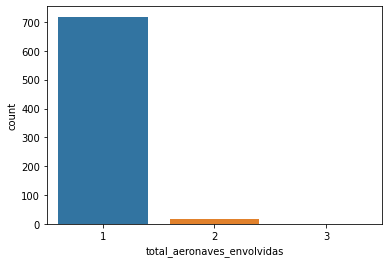

In [ ]:
sns.countplot(data=grave, x='total_aeronaves_envolvidas')
plt.show()

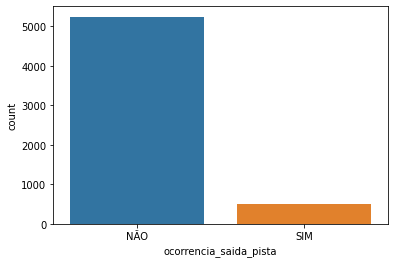

In [ ]:
sns.countplot(data=df, x='ocorrencia_saida_pista')
plt.show()

In [ ]:
df.head()

,ocorrencia_classificacao,ocorrencia_latitude,ocorrencia_longitude,ocorrencia_cidade,ocorrencia_uf,ocorrencia_pais,ocorrencia_aerodromo,ocorrencia_dia,ocorrencia_hora,investigacao_aeronave_liberada,investigacao_status,divulgacao_relatorio_numero,divulgacao_relatorio_publicado,divulgacao_dia_publicacao,total_recomendacoes,total_aeronaves_envolvidas,ocorrencia_saida_pista
0,INCIDENTE,***,***,RIO DE JANEIRO,RJ,BRASIL,****,03/01/2010,12:00:00,SIM,FINALIZADA,***,NÃO,NaN,0,1,NÃO
1,INCIDENTE,NaN,NaN,BELÉM,PA,BRASIL,SBBE,03/01/2010,11:05:00,SIM,FINALIZADA,NaN,NÃO,NaN,0,1,NÃO
2,INCIDENTE,NaN,NaN,RIO DE JANEIRO,RJ,BRASIL,SBRJ,03/01/2010,03:00:00,SIM,FINALIZADA,NaN,NÃO,NaN,0,1,NÃO
3,ACIDENTE,-13.1066666667,-55.9930555556,LUCAS DO RIO VERDE,MT,BRASIL,****,04/01/2010,17:30:00,SIM,FINALIZADA,A-539/CENIPA/2018,SIM,2019-10-28,0,1,NÃO
4,INCIDENTE,NaN,NaN,PELOTAS,RS,BRASIL,SBPK,05/01/2010,19:25:00,SIM,FINALIZADA,NaN,NÃO,NaN,0,1,NÃO


In [ ]:
import re

In [ ]:
df['ocorrencia_latitude'] = df['ocorrencia_latitude'].replace(r"\*", " ", regex=True)
df['ocorrencia_latitude'] = df['ocorrencia_latitude'].replace(r"--", "-", regex=True)

In [ ]:
df['ocorrencia_dia'] = pd.to_datetime(df['ocorrencia_dia'],format='%d/%m/%Y')
df['ocorrencia_dia']

0      2010-01-03
1      2010-01-03
2      2010-01-03
3      2010-01-04
4      2010-01-05
          ...    
5747   2020-12-29
5748   2020-12-30
5749   2020-12-30
5750   2020-12-31
5751   2020-12-31
Name: ocorrencia_dia, Length: 5752, dtype: datetime64[ns]

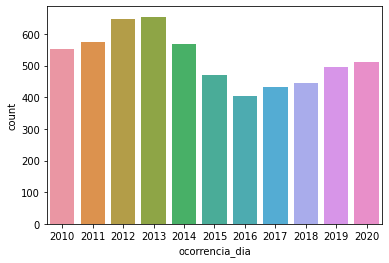

In [ ]:
sns.countplot(data=df, x=df['ocorrencia_dia'].dt.year)
plt.show()

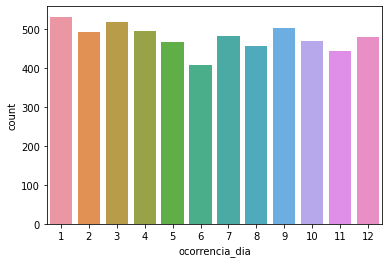

In [ ]:
sns.countplot(data=df, x=df['ocorrencia_dia'].dt.month)
plt.show()

In [ ]:
df['ocorrencia_hora'] = pd.to_datetime(df['ocorrencia_hora'],format='%H:%M:%S')
df['ocorrencia_hora']

0      1900-01-01 12:00:00
1      1900-01-01 11:05:00
2      1900-01-01 03:00:00
3      1900-01-01 17:30:00
4      1900-01-01 19:25:00
               ...        
5747   1900-01-01 19:00:00
5748   1900-01-01 18:30:00
5749   1900-01-01 00:54:00
5750   1900-01-01 09:00:00
5751   1900-01-01 13:24:00
Name: ocorrencia_hora, Length: 5752, dtype: datetime64[ns]

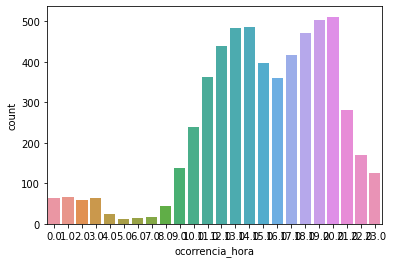

In [ ]:
sns.countplot(data=df, x=df['ocorrencia_hora'].dt.hour)
plt.show()

In [ ]:
grave = df.query('ocorrencia_classificacao == "INCIDENTE GRAVE"')

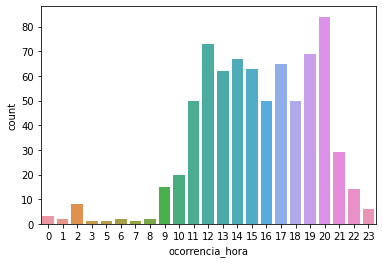

In [ ]:
sns.countplot(data=grave, x=grave['ocorrencia_hora'].dt.hour)
plt.show()

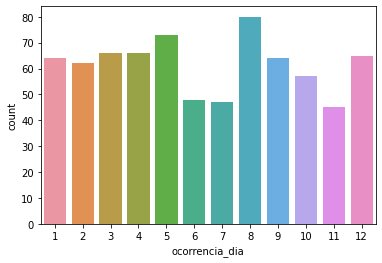

In [ ]:
sns.countplot(data=grave, x=grave['ocorrencia_dia'].dt.month)
plt.show()

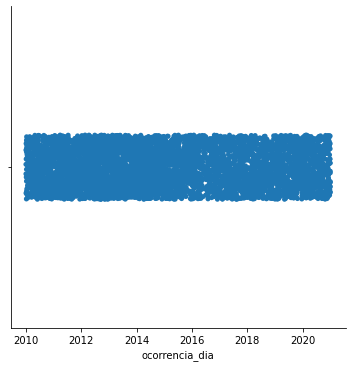

In [ ]:
sns.catplot(data=df, x='ocorrencia_dia')

plt.show()